# InfoPillar Solution Nov2021

Name - Suraj Shrimant Mane

Task-2: Fake News Detection

Dataset-:https://bit.ly/3FxCSC4

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv('news.csv')
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Shape of the Dataset

In [3]:
dataset.shape 

(6335, 4)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
dataset.drop("Unnamed: 0", axis=1, inplace=True)

# Data Cleaning 

In [6]:
dataset.isnull().sum()  #Checking for NaN values

title    0
text     0
label    0
dtype: int64

# Checking Duplicate Values

In [7]:
dataset.duplicated().sum()  #Checking for Dublicate Values


29

In [8]:
dataset.drop_duplicates(keep='first', inplace=True)  # Droping the dupicates

# Data Visualization

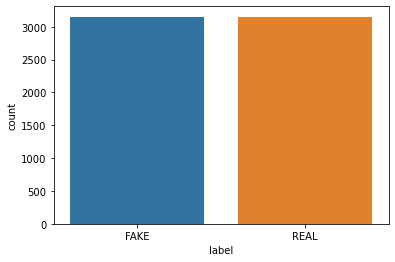

In [9]:
sns.countplot(data=dataset, x='label')
plt.show()

In [10]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer

ps = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

In [11]:
def tranform_text(text):
    text = text.lower()     # Converting to lower case

    word_arr = nltk.word_tokenize(text)                                                     
    correct = []

    for word in word_arr:
        if (word.isalnum()) and (word not in STOPWORDS) and (word not in punctuation):      
            correct.append(ps.stem(word))                                                   

    return " ".join(correct)

In [12]:
dataset['title'] = dataset['title'].apply(tranform_text)
dataset['text'] = dataset['text'].apply(tranform_text)

In [13]:
dataset.head()

,title,text,label
0,smell hillari fear,daniel greenfield shillman journal fellow free...,FAKE
1,watch exact moment paul ryan commit polit suic...,googl pinterest digg linkedin reddit stumbleup...,FAKE
2,kerri go pari gestur sympathi,secretari state john kerri said monday stop pa...,REAL
3,berni support twitter erupt anger dnc tri warn,kayde king kaydeek novemb 9 2016 lesson tonigh...,FAKE
4,battl new york primari matter,primari day new york hillari clinton donald tr...,REAL


# Using TF-IDF for Vectorizing

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(max_features=3000)
tfidf_text = TfidfVectorizer(max_features=25000)

In [15]:
title = tfidf_title.fit_transform(dataset['title']).toarray()
text = tfidf_text.fit_transform(dataset['text']).toarray()

In [16]:
print("Shape of Transformed Title :-> ",title.shape) 
print("Shape of Transformed Text :-> ",text.shape)

Shape of Transformed Title :->  (6306, 3000)
Shape of Transformed Text :->  (6306, 25000)


In [17]:
df_title = pd.DataFrame(title)
df_text = pd.DataFrame(text)

In [18]:
df = pd.concat([df_title, df_text], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(dataset['label'])

# Spliting Data into Train and Test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=10)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return round(accuracy,4), cf_matrix, round(precision,4)

# Applying Algorithms

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
gnb = GaussianNB()
pac = PassiveAggressiveClassifier()

In [25]:
print("Gaussian Naive Bayse :-> ")
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy, gnb_cf_mat, gnb_precision = evaluate(y_test, gnb_pred)
print("Accuracy : ", gnb_accuracy)
print("Precision Score : ", gnb_precision)
print("Confusion Matrix : ")
print(gnb_cf_mat)

Gaussian Naive Bayse :-> 
Accuracy :  0.7821
Precision Score :  0.7981
Confusion Matrix : 
[[493 125]
 [150 494]]


In [26]:
print("Passive Aggressive Classifier :-> ")
pac.fit(X_train, y_train)
pac_pred = pac.predict(X_test)
pac_accuracy, pac_cf_mat, pac_precision = evaluate(y_test, pac_pred)
print("Accuracy : ", pac_accuracy)
print("Precision Score : ", pac_precision)
print("Confusion Matrix : ")
print(pac_cf_mat)

Passive Aggressive Classifier :-> 
Accuracy :  0.9279
Precision Score :  0.9382
Confusion Matrix : 
[[579  39]
 [ 52 592]]


# Passive Agressive Classifier is the Best Model with 92% Accuracy Score